In [1]:
import random
from time import perf_counter

from algorithms_sc.sorts import gnome_sort, shaker_sort
from algorithms_sc.sorts.utils import generate_stand
from tqdm.auto import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Задание

Сравнить алгоритмы шейкерной и гномьей сортировки по времени в двух варинтах:
- в зависимости от длины массива
- в зависимости от степени отсортированности массива (при фиксированной длине $\approx 10^4$)

## 1. Зависимость от длины массива

In [9]:
EXP1_ARR_LENGTHS = [2 ** i for i in range(3, 16)]
N_REPEATS = 25

exp1_metrics = []
for arr_len in tqdm(EXP1_ARR_LENGTHS, desc='Lengths'):
    current_metrics = []
    for _ in range(N_REPEATS):
        random_lst = random.sample(range(arr_len ** 2), arr_len)
        start_time = perf_counter()
        _ = shaker_sort(random_lst)
        shaker_endtime = perf_counter()
        _ = gnome_sort(random_lst)
        gnome_endtime = perf_counter()

        current_metrics.append([shaker_endtime - start_time, gnome_endtime - shaker_endtime])
    exp1_metrics.append(current_metrics)

exp1_metrics = np.array(exp1_metrics)


Lengths:  85%|████████▍ | 11/13 [22:34<04:06, 123.13s/it]


KeyboardInterrupt: 

In [5]:
mean_exp1 = np.mean(exp1_metrics, axis=1)
std_exp1 = np.std(exp1_metrics, axis=1)
min_exp1 = np.min(exp1_metrics, axis=1)
max_exp1 = np.max(exp1_metrics, axis=1)

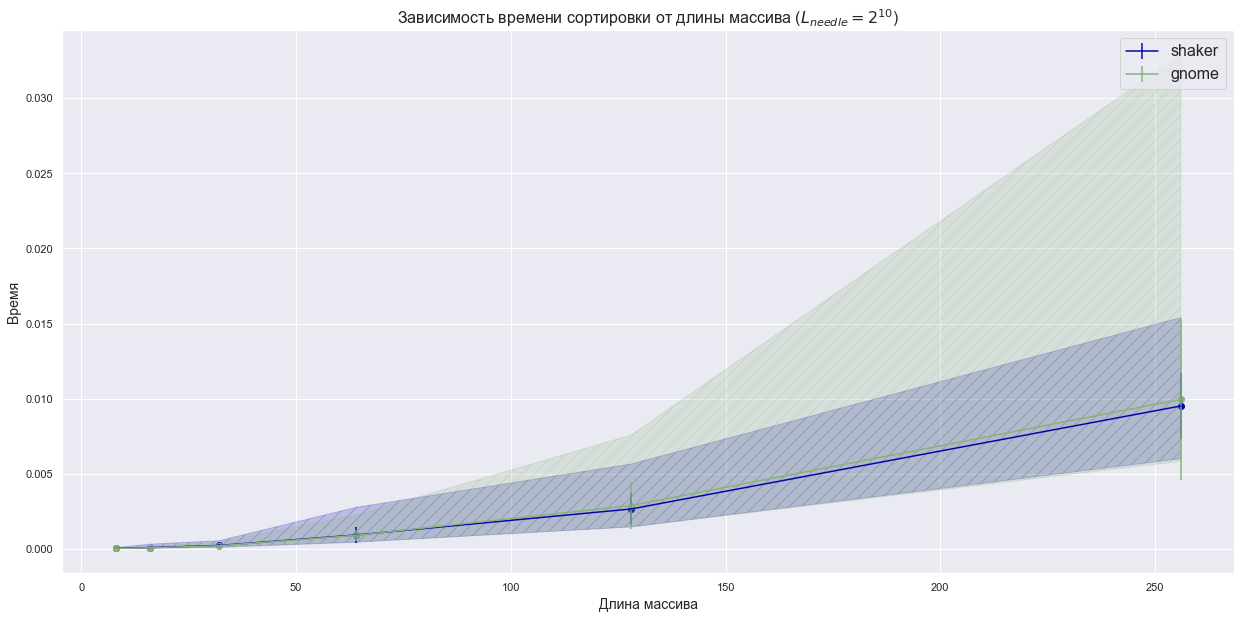

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(21, 10))
ax.errorbar(EXP1_ARR_LENGTHS, mean_exp1[:, 0], yerr=std_exp1[:, 0], label='shaker', color=sns.xkcd_rgb['royal blue'])
ax.scatter(EXP1_ARR_LENGTHS, mean_exp1[:, 0], marker='o', color=sns.xkcd_rgb['royal blue'])
ax.fill_between(EXP1_ARR_LENGTHS, max_exp1[:, 0], min_exp1[:, 0], hatch='//', color=sns.xkcd_rgb['royal blue'], alpha=0.2)

ax.errorbar(EXP1_ARR_LENGTHS, mean_exp1[:, 1], yerr=std_exp1[:, 1], label='gnome', color=sns.xkcd_rgb['sage green'])
ax.scatter(EXP1_ARR_LENGTHS, mean_exp1[:, 1], marker='o', color=sns.xkcd_rgb['sage green'])
ax.fill_between(EXP1_ARR_LENGTHS, max_exp1[:, 1], min_exp1[:, 1], hatch='//', color=sns.xkcd_rgb['sage green'], alpha=0.2)
ax.legend(fontsize=16)
ax.set_title('Зависимость времени сортировки от длины массива ($L_{needle} = 2^{10}$)', fontsize=16)
ax.set_xlabel('Длина массива', fontsize=14)
ax.set_ylabel('Время', fontsize=14);